Pb208 densities from Markus Kortelainen 7.4.2025

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [21]:
from scipy.interpolate import RegularGridInterpolator

fname="UNEDF0"
rc1,zc1,rhn1  = np.loadtxt('den_neutron_208Pb_'+fname+'.dat',dtype='float',usecols=[0,1,2], comments='#').T
rc1,zc1,rhp1  = np.loadtxt('den_proton_208Pb_'+fname+'.dat',dtype='float',usecols=[0,1,2], comments='#').T

zmax = 8.5
zmin = -zmax
rmax = 8.5
rmin = 0.0
scutoff = 0.0009
tcutoff = 0.0009
zpoints = 400
rpoints = 400
spinlw = 2.0

 # dublicate to -z values.
rcb1 = np.append(rc1,rc1) ;    zcb1 = np.append(zc1,-zc1) ;
rhn1 = np.append(rhn1,rhn1) ;  rhp1 = np.append(rhp1,rhp1);

# dublicate to -r_rho values.
rcb1 = np.append(rcb1,-rcb1) ; zcb1 = np.append(zcb1,zcb1) ;
rhn1 = np.append(rhn1,rhn1)  ; rhp1 = np.append(rhp1,rhp1);

# Set up a regular grid of interpolation points
ri, zi = np.linspace(rmin, rmax, rpoints), np.linspace(zmin, zmax, zpoints)
extent=(rmin, rmax, zmin, zmax)
ri, zi = np.meshgrid(ri, zi)

# use griddata
rhon = scipy.interpolate.griddata((rcb1,zcb1),rhn1,(ri,zi),method='cubic')
rhop = scipy.interpolate.griddata((rcb1,zcb1),rhp1,(ri,zi),method='cubic')

# Create a 2D interpolator for rhon
rhon_interpolator = RegularGridInterpolator((np.linspace(rmin, rmax, rpoints), np.linspace(zmin, zmax, zpoints)), rhon.T)
rhop_interpolator = RegularGridInterpolator((np.linspace(rmin, rmax, rpoints), np.linspace(zmin, zmax, zpoints)), rhop.T)

In [12]:
rhon_interpolator([1,1])

array([0.0920582])

In [22]:
xvals=np.linspace(0,7)
yvals=np.linspace(0,7)

rdata=[]
rhodata=[]
rhopdata=[]
for x in xvals:
    for y in yvals:
        rdata.append((x**2+y**2)**0.5)
        rhodata.append(rhon_interpolator([x,y]))
        rhopdata.append(rhop_interpolator([x,y]))

In [29]:
import pandas as pd

In [30]:
df_n = pd.DataFrame({'r': rdata, 'rho': rhodata})
df_p = pd.DataFrame({'r': rdata, 'rho': rhopdata})

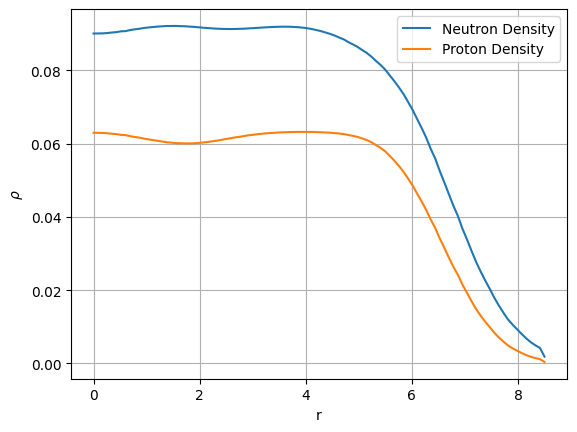

In [42]:
# Group by 'r' and calculate the mean of 'rho'
df_n = df_n.groupby('r').mean().reset_index()
df_p = df_p.groupby('r').mean().reset_index()

average_rho_n = df_n.groupby('r')['rho'].mean()
average_rho_p = df_p.groupby('r')['rho'].mean()

# Calculate mean value of rho in 100 different r bins
bins = np.linspace(rmin, rmax, 100)  # 100 bins
df_n['bin'] = np.digitize(df_n['r'], bins)
df_p['bin'] = np.digitize(df_p['r'], bins)

df_n['bin_center'] = bins[df_n['bin'] - 1] + (bins[1] - bins[0]) / 2
df_p['bin_center'] = bins[df_p['bin'] - 1] + (bins[1] - bins[0]) / 2

average_rho_n = df_n.groupby('bin')['rho'].mean()
average_rho_p = df_p.groupby('bin')['rho'].mean()
# Add the center point of the bin to the dataframes



plt.plot(bins, average_rho_n.values, label="Neutron Density")
plt.plot(bins, average_rho_p.values, label="Proton Density")

# Plot the result
#plt.plot(average_rho_n.index, average_rho_n.values/(208-82), label="neutron")
#plt.plot(average_rho_p.index, average_rho_p.values/82, label="proton")

plt.xlabel('r')
plt.ylabel(r"$\rho$")

leg=plt.legend(loc="upper right")

plt.grid()
plt.show()

# Print a grid to be interpolated in C++ code
# Normalize the values such that the largest value is 1
normalized_rho_n = average_rho_n.values / max(average_rho_n.values)
normalized_rho_p = average_rho_p.values / max(average_rho_p.values)

# Write the normalized values to a file
with open("normalized_rho_values.txt", "w") as f:
    f.write("# r, normalized_rho_neutron, normalized_rho_proton\n")
    for r, rho_n, rho_p in zip(bins, normalized_rho_n, normalized_rho_p):
        f.write(f"{r} {rho_n[0]} {rho_p[0]}\n")

In [28]:
andrvals = np.linspace(0.0,rmax,num=rpoints)
rhonz0 = np.linspace(0.0,rmax,num=rpoints)
rhopz0 = np.linspace(0.0,rmax,num=rpoints)

for i in range(0,rpoints):
    rhonz0[i] = rhonln(rvals[i],0.0)
    rhopz0[i] = rhopln(rvals[i],0.0)

NameError: name 'rhonln' is not defined